# DS life cycle project
- understand the problem
- get data
- check data
- EDA
- Data preprocessing
- Model Training
- chose the model





# Data Checks to perform
-	Check Missing values
-	Check Duplicates
-	Check data type
-	Check the number of unique values of each column
-	Check statistics of data set
-	Check various categories present in the different categorical column

In [1]:


# About this file

#  longitude: A measure of how far west a house is; a higher value is farther west

#  latitude: A measure of how far north a house is; a higher value is farther north

#  housingMedianAge: Median age of a house within a block; a lower number is a newer building

#  totalRooms: Total number of rooms within a block

#  totalBedrooms: Total number of bedrooms within a block

#  population: Total number of people residing within a block

#  households: Total number of households, a group of people residing within a home unit, for a block

#  medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

#  medianHouseValue: Median house value for households within a block (measured in US Dollars)

#  oceanProximity: Location of the house w.r.t ocean/sea



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
housing = pd.read_csv('/content/housing.csv')

In [4]:
housing.shape

(20640, 10)

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [6]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [8]:
len(housing['total_bedrooms'])

20640

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [12]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [13]:

categorical_columns = housing.select_dtypes(include=['object']).columns
numerical_columns = housing.select_dtypes(include=['int', 'float']).columns

In [14]:
numerical_columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

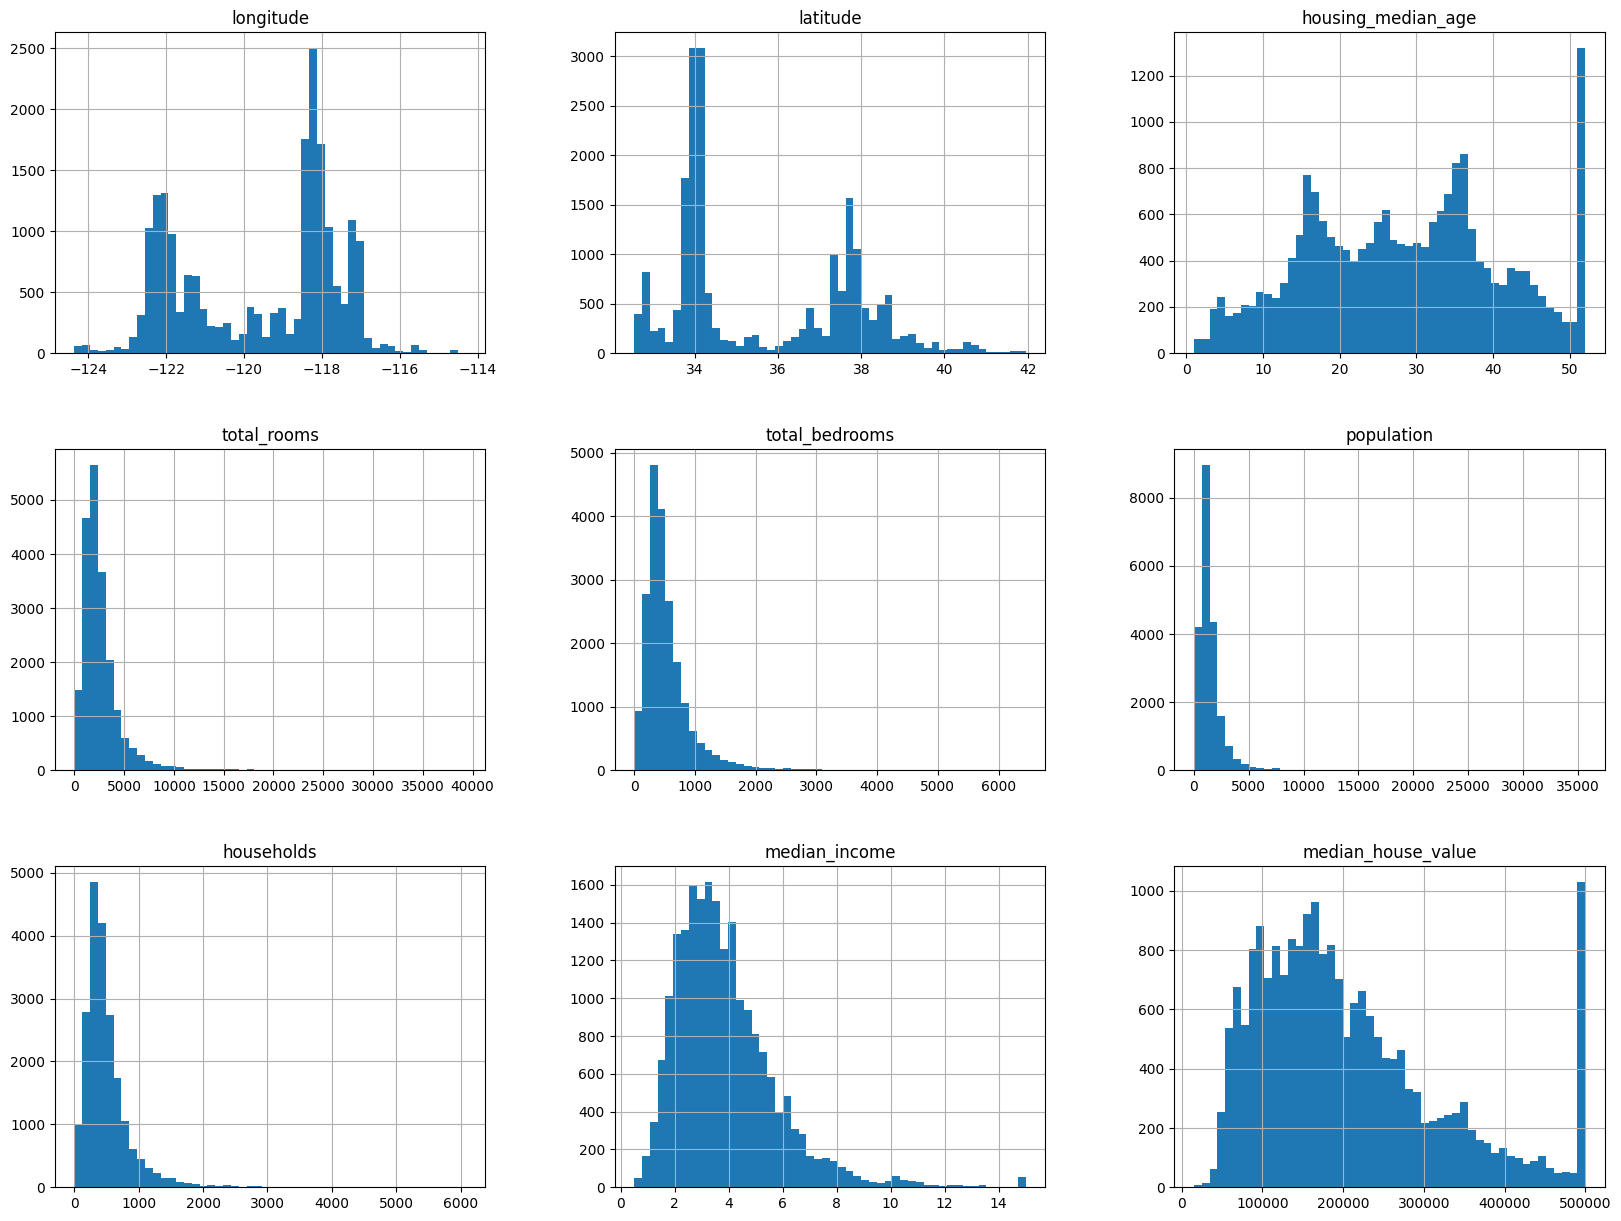

In [15]:
# for i in numerical_columns:
#   plt.hist(housing[i], bins=50, edgecolor='black')

#   plt.xlabel(i)
#   plt.ylabel('Frequency')
#   plt.title(f'Histogram of {i}')

#   plt.show()
#   print()

# --------------------------------

housing.hist(bins=50,figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

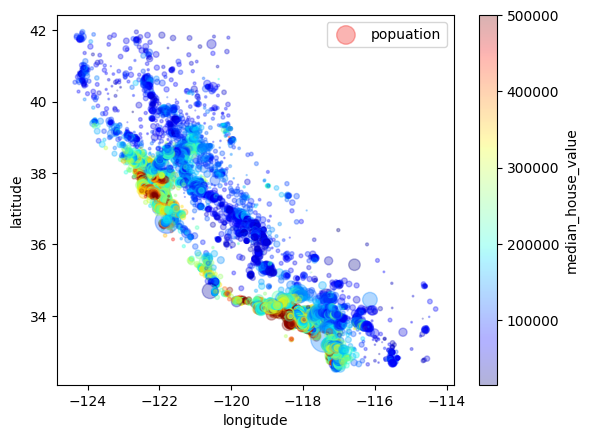

In [16]:
housing.plot(kind = "scatter" , x = "longitude" , y = "latitude",alpha = 0.3, s = housing["population"]/100,label = "popuation", c = 'median_house_value',cmap = plt.get_cmap("jet")  )


In [17]:
housing.corr()

<ipython-input-17-d2be9c065d6d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


<ipython-input-18-94bb71ae1c2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing.corr()


<Axes: >

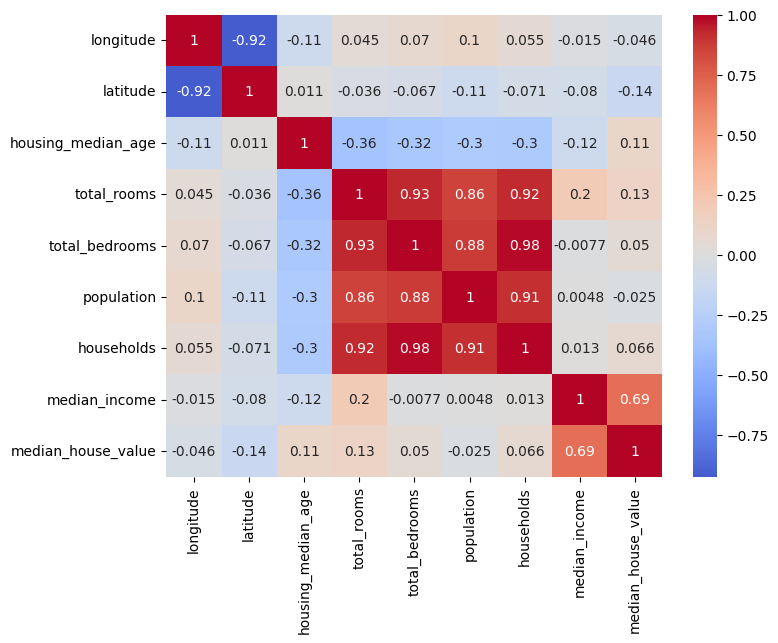

In [18]:
correlation_matrix = housing.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)


In [19]:
import plotly.express as px

# Count the occurrences of each cut category
ocean_proximity_a = housing['ocean_proximity'].value_counts().reset_index()
ocean_proximity_a.columns = ['ocean_proximity', 'count']

# Create an interactive pie plot using Plotly
fig = px.pie(ocean_proximity_a, values='count', names='ocean_proximity', title='ocean_proximity Distribution')
fig.show()

In [20]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending = False)

<ipython-input-20-3d237116bac2>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [21]:
housing_na=housing.dropna(subset=["total_bedrooms"])
housing_na.shape

(20433, 10)

In [22]:
dummies = pd.get_dummies(housing_na.ocean_proximity)
housing_na_dummies = pd.concat([housing_na,dummies],axis = 'columns')
housing_na_dummies.head()
housing_clean = housing_na_dummies.drop(['ocean_proximity','ISLAND'], axis = 'columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,1,0
